## Changes to dataset

In [4]:
import pandas as pd
import numpy as np
import random 

In [5]:
df = pd.read_csv('../../datasets/exams.csv')

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df['id_student'] = df.index + 1000

In [8]:
df['address'] = np.nan
df['Year'] = random.choices([2023, 1990], weights=[95,5], k=1000)
df['Age'] = random.choices([17, 16, 15, 14, np.nan], weights=[23, 23, 23, 23, 8], k=1000)

In [9]:
df.loc[11, 'math score'] = 120

In [10]:
df = pd.concat([df, df.iloc[:10]])

In [11]:
df.shape

(1010, 12)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,female,group D,some high school,free/reduced,none,40,59,55,1001,NaN,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [13]:
df['test preparation course'].value_counts()

none         672
completed    338
Name: test preparation course, dtype: int64

In [14]:
df['race/ethnicity'].value_counts()

group C    324
group D    265
group B    206
group E    134
group A     81
Name: race/ethnicity, dtype: int64

In [15]:
df['parental level of education'].value_counts()

some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: parental level of education, dtype: int64

In [16]:
df['gender'].value_counts()

male      524
female    486
Name: gender, dtype: int64

In [17]:
df.iloc[:100]['gender'].replace('female', 'Female', inplace=True)
df.iloc[:100]['gender'].replace('male', 'Male', inplace=True)

/var/folders/f9/bj8yxvjx2l57psdr1xj01vk00000gn/T/ipykernel_70219/1512924205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:100]['gender'].replace('female', 'Female', inplace=True)
/var/folders/f9/bj8yxvjx2l57psdr1xj01vk00000gn/T/ipykernel_70219/1512924205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:100]['gender'].replace('male', 'Male', inplace=True)


In [18]:
df.iloc[100:300]['gender'].replace('female', 'FEMALE', inplace=True)
df.iloc[100:300]['gender'].replace('male', 'MALE', inplace=True)

/var/folders/f9/bj8yxvjx2l57psdr1xj01vk00000gn/T/ipykernel_70219/3938481647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[100:300]['gender'].replace('female', 'FEMALE', inplace=True)
/var/folders/f9/bj8yxvjx2l57psdr1xj01vk00000gn/T/ipykernel_70219/3938481647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[100:300]['gender'].replace('male', 'MALE', inplace=True)


In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,59,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [20]:
df['gender'].value_counts()

male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: gender, dtype: int64

In [21]:
df.loc[df[df['writing score'] > 80].index, 'writing score'] = 100

<AxesSubplot:ylabel='Frequency'>

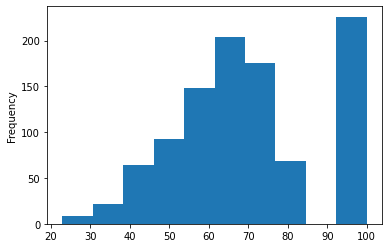

In [22]:
df['writing score'].plot(kind='hist', bins=10)

In [30]:
df.to_csv('../../datasets/exams_mod.csv', index=None)

In [31]:
df.reset_index(inplace=True, drop=True)

In [32]:
df[(df['test preparation course'] == 'none') & (df['parental level of education'] == 'some high school')]['reading score']

1       59
24      38
26      60
29      54
51      58
        ..
974     59
980     50
983     50
997     35
1001    59
Name: reading score, Length: 129, dtype: int64

In [33]:
df.loc[df[(df['test preparation course'] == 'none') & (df['parental level of education'] == 'some high school')].index, 'reading score']  = df[(df['test preparation course'] == 'none') & (df['parental level of education'] == 'some high school')]['reading score'] / 2

In [34]:
df[(df['test preparation course'] == 'none') & (df['parental level of education'] == 'some high school')]['reading score']

1       29.5
24      19.0
26      30.0
29      27.0
51      29.0
        ... 
974     29.5
980     25.0
983     25.0
997     17.5
1001    29.5
Name: reading score, Length: 129, dtype: float64

In [35]:
df['reading score'] = df['reading score'].astype(int)

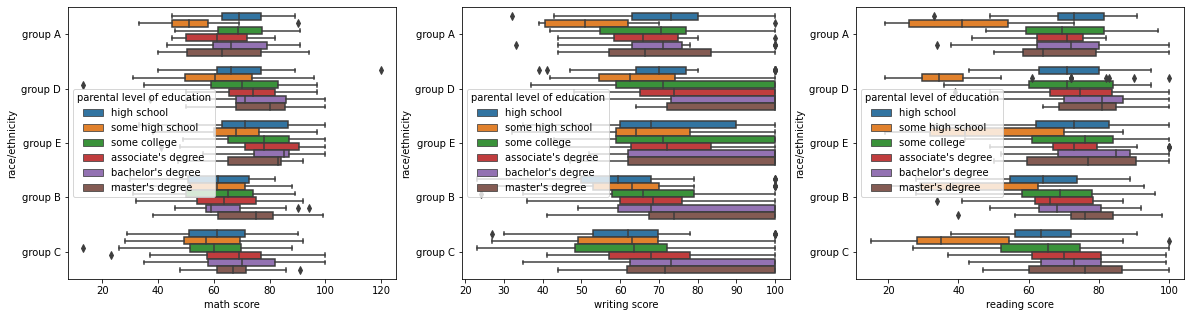

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#Start Figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['race/ethnicity'], ax=ax1, hue=df['parental level of education'])
sns.boxplot(x=df['writing score'], y=df['race/ethnicity'], ax=ax2, hue=df['parental level of education'])
sns.boxplot(x=df['reading score'], y=df['race/ethnicity'], ax=ax3, hue=df['parental level of education'])


#Save or show
plt.show()

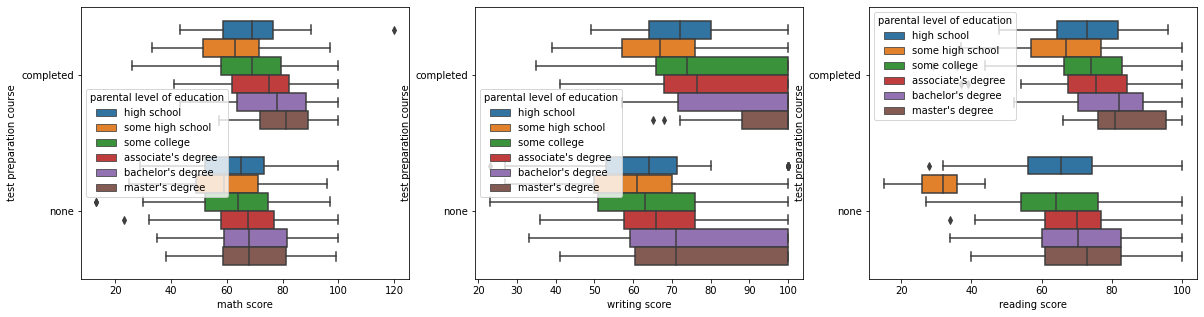

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['test preparation course'], ax=ax1, hue=df['parental level of education'])
sns.boxplot(x=df['writing score'], y=df['test preparation course'], ax=ax2, hue=df['parental level of education'])
sns.boxplot(x=df['reading score'], y=df['test preparation course'], ax=ax3, hue=df['parental level of education'])


#Save or show
plt.show()

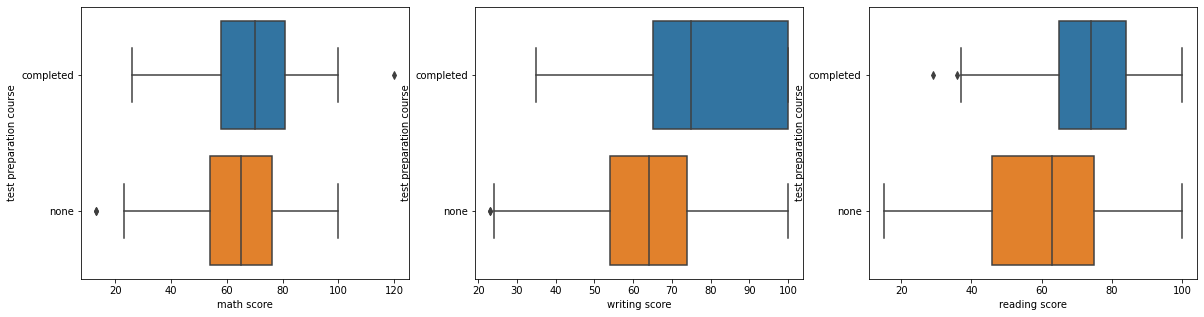

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['test preparation course'], ax=ax1)
sns.boxplot(x=df['writing score'], y=df['test preparation course'], ax=ax2)
sns.boxplot(x=df['reading score'], y=df['test preparation course'], ax=ax3)


#Save or show
plt.show()

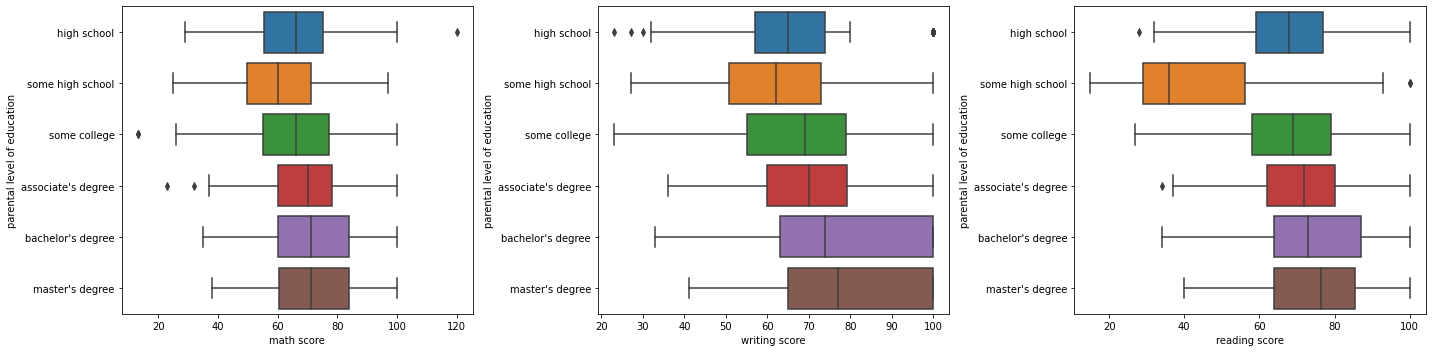

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['parental level of education'], ax=ax1)
sns.boxplot(x=df['writing score'], y=df['parental level of education'], ax=ax2)
sns.boxplot(x=df['reading score'], y=df['parental level of education'], ax=ax3)

plt.tight_layout()
#Save or show
plt.show()

In [40]:
df.to_csv('../../datasets/exams_mod.csv', index=None)